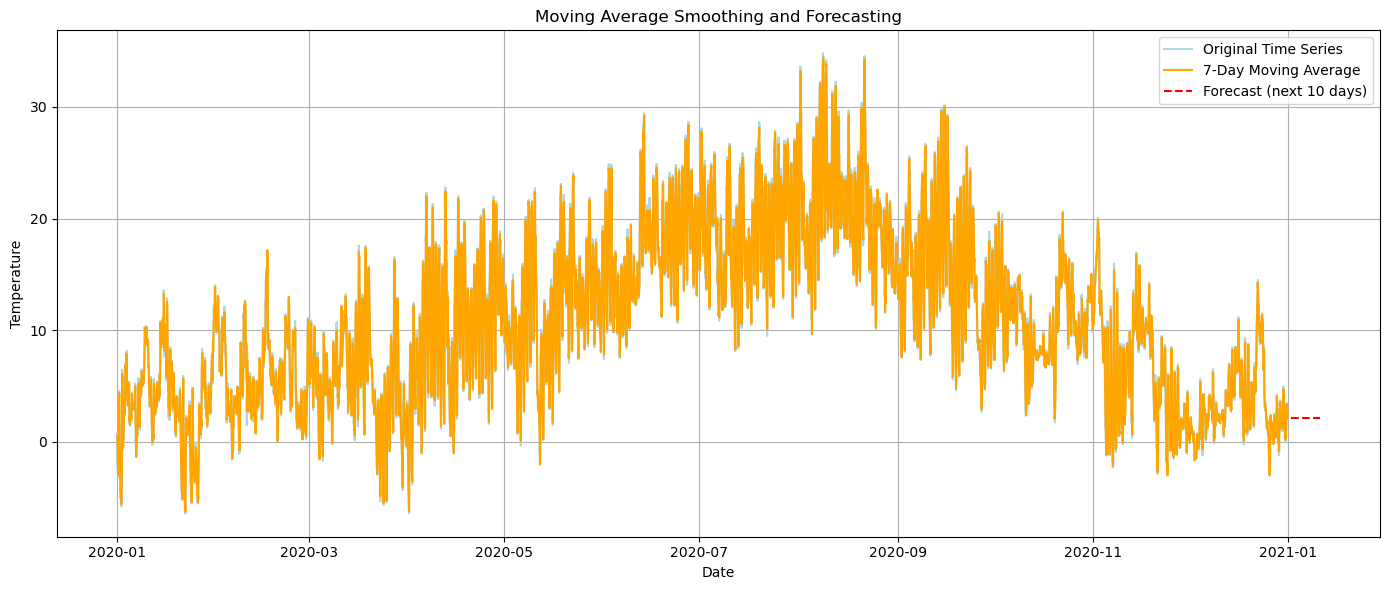

RMSE between Original and Smoothed series: 0.55


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv(r"C:\Users\harsh\Downloads\cleaned_weather.csv", parse_dates=['date'], index_col='date')

# Select the target time series column 
time_series = df['T']

# Apply Moving Average Smoothing with a window size of 7
df['MA_7'] = time_series.rolling(window=7).mean()

# Forecasting: Extend the moving average trend into the future (simple approach)
forecast_steps = 10
last_ma = df['MA_7'].dropna().iloc[-1]
forecast = [last_ma] * forecast_steps
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Create a forecast DataFrame
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})
forecast_df.set_index('Date', inplace=True)

# Plot original time series and smoothed series
plt.figure(figsize=(14, 6))
plt.plot(time_series, label='Original Time Series', color='lightblue')
plt.plot(df['MA_7'], label='7-Day Moving Average', color='orange')
plt.plot(forecast_df['Forecast'], label='Forecast (next 10 days)', color='red', linestyle='--')
plt.title('Moving Average Smoothing and Forecasting')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Calculate RMSE for available smoothed data (ignoring NaN)
rmse = np.sqrt(mean_squared_error(time_series[6:], df['MA_7'][6:]))
print(f'RMSE between Original and Smoothed series: {rmse:.2f}')
